In [ ]:
!pip install torchinfo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch
from torchvision import transforms as T

import torch.optim as optim

from models.s8 import SkipNet
from utils import build_cifar, Trainer, plot_sampledata, plot_misclassified

# Load Data

In [ ]:
# Train data transformations
train_transforms = T.Compose(
    [
        T.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.40, hue=0.1),
        T.RandomRotation((-5.0, 5.0), fill=(0.49139968, 0.48215841, 0.44653091)),
        T.RandomHorizontalFlip(),
        T.ToTensor(),
        T.Normalize(
            (0.49139968, 0.48215841, 0.44653091),
            (0.24703223, 0.24348513, 0.26158784),
        ),
    ]
)

# Test data transformations
test_transforms = T.Compose([T.ToTensor(), T.Normalize((0.1307,), (0.3081,))])

batch_size = 64

kwargs = {
    "batch_size": batch_size,
    "shuffle": True,
    "num_workers": 2,
    "pin_memory": True,
}

train_data, train_loader = build_cifar(set="train", transforms=train_transforms, **kwargs)
test_data, test_loader = build_cifar(set="test", transforms=test_transforms, **kwargs)

100%|██████████| 170498071/170498071 [00:02<00:00, 73438701.74it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


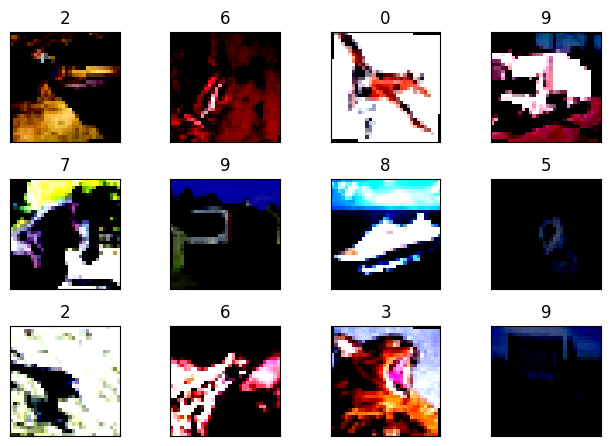

In [ ]:
plot_sampledata(train_loader)

In [ ]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = SkipNet(norm="gn").to(device)

In [ ]:
model.summarize(device, (1, 3, 32, 32))

Layer (type:depth-idx)                   Output Shape              Param #
SkipNet                                  [1, 10]                   --
├─Sequential: 1-1                        [1, 16, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 8, 32, 32]            216
│    └─ReLU: 2-2                         [1, 8, 32, 32]            --
│    └─GroupNorm: 2-3                    [1, 8, 32, 32]            16
│    └─Dropout2d: 2-4                    [1, 8, 32, 32]            --
│    └─Conv2d: 2-5                       [1, 16, 32, 32]           1,152
│    └─ReLU: 2-6                         [1, 16, 32, 32]           --
│    └─GroupNorm: 2-7                    [1, 16, 32, 32]           32
│    └─Dropout2d: 2-8                    [1, 16, 32, 32]           --
├─Sequential: 1-2                        [1, 8, 16, 16]            --
│    └─Conv2d: 2-9                       [1, 8, 32, 32]            128
│    └─ReLU: 2-10                        [1, 8, 32, 32]            --
│    └─Dro

In [ ]:
num_epochs = 20
model = SkipNet(drop=0.01, norm="gn").to(device)
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
scheduler = optim.lr_scheduler.OneCycleLR(
    optimizer, max_lr=0.1, epochs=num_epochs, steps_per_epoch=len(train_loader)
)
# scheduler = None

trainer = Trainer(model, device, optimizer, scheduler)
for epoch in range(1, num_epochs + 1):
    print(f"Epoch {epoch}")
    trainer.train(train_loader)
    trainer.test(test_loader)

Epoch 1


Train: Loss=1.5462 Batch_id=781 Accuracy=29.12: 100%|██████████| 782/782 [00:54<00:00, 14.27it/s]


Test set: Average loss: 1.7649, Accuracy: 3577/10000 (35.77%)

Epoch 2


Train: Loss=1.4644 Batch_id=781 Accuracy=40.99: 100%|██████████| 782/782 [00:52<00:00, 14.93it/s]


Test set: Average loss: 1.6249, Accuracy: 4088/10000 (40.88%)

Epoch 3


Train: Loss=1.3109 Batch_id=781 Accuracy=47.61: 100%|██████████| 782/782 [00:52<00:00, 14.93it/s]


Test set: Average loss: 1.4100, Accuracy: 4708/10000 (47.08%)

Epoch 4


Train: Loss=0.9772 Batch_id=781 Accuracy=52.75: 100%|██████████| 782/782 [00:53<00:00, 14.55it/s]


Test set: Average loss: 1.1995, Accuracy: 5651/10000 (56.51%)

Epoch 5


Train: Loss=1.0327 Batch_id=781 Accuracy=55.62: 100%|██████████| 782/782 [00:52<00:00, 14.98it/s]


Test set: Average loss: 1.1164, Accuracy: 5996/10000 (59.96%)

Epoch 6


Train: Loss=1.2268 Batch_id=781 Accuracy=58.59: 100%|██████████| 782/782 [00:52<00:00, 14.99it/s]


Test set: Average loss: 1.2048, Accuracy: 5729/10000 (57.29%)

Epoch 7


Train: Loss=1.1353 Batch_id=781 Accuracy=60.55: 100%|██████████| 782/782 [00:52<00:00, 14.94it/s]


Test set: Average loss: 1.0928, Accuracy: 6127/10000 (61.27%)

Epoch 8


Train: Loss=0.8392 Batch_id=781 Accuracy=61.97: 100%|██████████| 782/782 [00:53<00:00, 14.58it/s]


Test set: Average loss: 1.2146, Accuracy: 5750/10000 (57.50%)

Epoch 9


Train: Loss=0.9002 Batch_id=781 Accuracy=62.90: 100%|██████████| 782/782 [00:52<00:00, 14.93it/s]


Test set: Average loss: 1.0188, Accuracy: 6380/10000 (63.80%)

Epoch 10


Train: Loss=1.3410 Batch_id=781 Accuracy=64.48: 100%|██████████| 782/782 [00:52<00:00, 14.91it/s]


Test set: Average loss: 0.9437, Accuracy: 6625/10000 (66.25%)

Epoch 11


Train: Loss=1.2078 Batch_id=781 Accuracy=65.10: 100%|██████████| 782/782 [00:53<00:00, 14.57it/s]


Test set: Average loss: 0.8784, Accuracy: 6839/10000 (68.39%)

Epoch 12


Train: Loss=1.3069 Batch_id=781 Accuracy=66.33: 100%|██████████| 782/782 [00:51<00:00, 15.09it/s]


Test set: Average loss: 0.9543, Accuracy: 6658/10000 (66.58%)

Epoch 13


Train: Loss=1.1314 Batch_id=781 Accuracy=67.16: 100%|██████████| 782/782 [00:50<00:00, 15.40it/s]


Test set: Average loss: 0.8389, Accuracy: 7104/10000 (71.04%)

Epoch 14


Train: Loss=0.6518 Batch_id=781 Accuracy=68.01: 100%|██████████| 782/782 [00:50<00:00, 15.54it/s]


Test set: Average loss: 0.8682, Accuracy: 6978/10000 (69.78%)

Epoch 15


Train: Loss=0.9881 Batch_id=781 Accuracy=68.64: 100%|██████████| 782/782 [00:49<00:00, 15.77it/s]


Test set: Average loss: 0.8316, Accuracy: 7065/10000 (70.65%)

Epoch 16


Train: Loss=1.0778 Batch_id=781 Accuracy=69.74: 100%|██████████| 782/782 [00:49<00:00, 15.83it/s]


Test set: Average loss: 0.7864, Accuracy: 7252/10000 (72.52%)

Epoch 17


Train: Loss=0.5713 Batch_id=781 Accuracy=71.07: 100%|██████████| 782/782 [00:50<00:00, 15.49it/s]


Test set: Average loss: 0.7661, Accuracy: 7345/10000 (73.45%)

Epoch 18


Train: Loss=0.8912 Batch_id=781 Accuracy=71.60: 100%|██████████| 782/782 [00:48<00:00, 15.97it/s]


Test set: Average loss: 0.7447, Accuracy: 7435/10000 (74.35%)

Epoch 19


Train: Loss=0.5914 Batch_id=781 Accuracy=72.39: 100%|██████████| 782/782 [00:49<00:00, 15.90it/s]


Test set: Average loss: 0.7367, Accuracy: 7473/10000 (74.73%)

Epoch 20


Train: Loss=1.1686 Batch_id=781 Accuracy=72.61: 100%|██████████| 782/782 [00:48<00:00, 15.96it/s]


Test set: Average loss: 0.7318, Accuracy: 7486/10000 (74.86%)



Set\t Max Acc@Epoch	 Last Epoch Acc
train	 72.61@20		72.61
test	 74.86@20		74.86


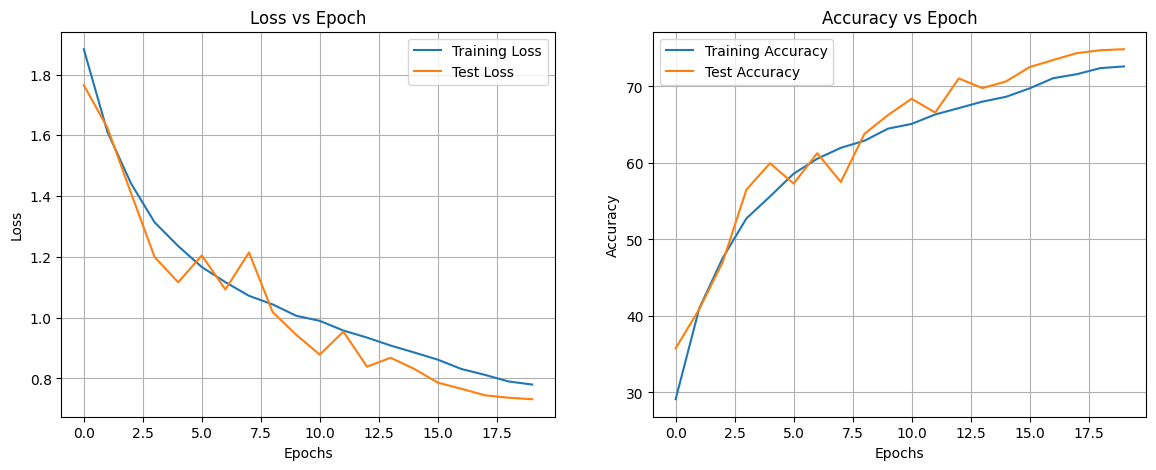

In [ ]:
trainer.plot_history()

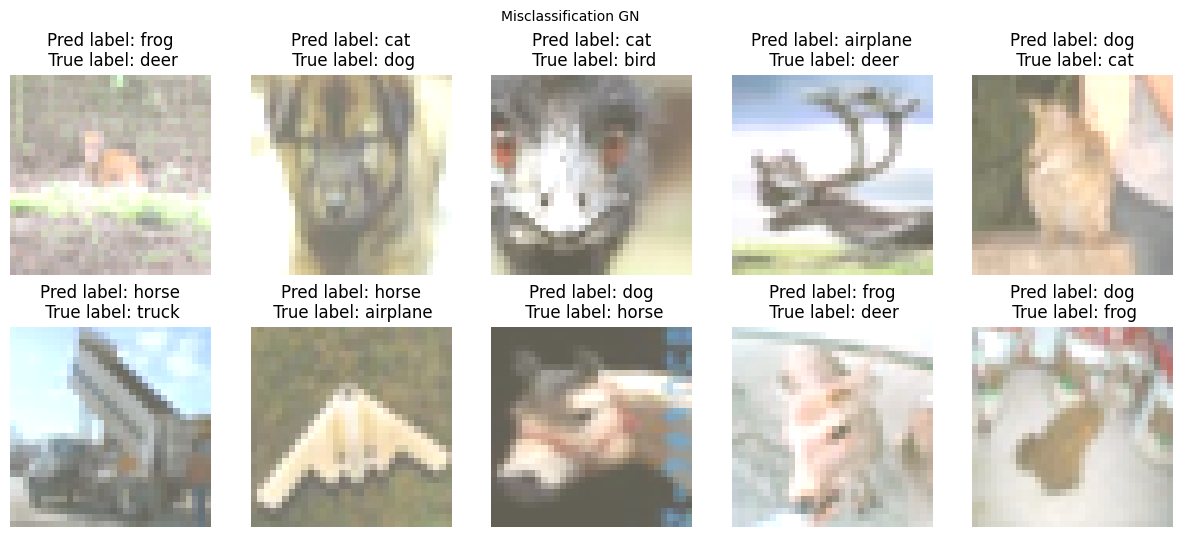

In [ ]:
plot_misclassified(
    model,
    test_loader,
    device,
    (0.49139968, 0.48215841, 0.44653091),
    (0.24703223, 0.24348513, 0.26158784),
    title="Misclassification GN ",
)